# Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV ,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
scores = {}

In [2]:
df = pd.read_csv('D:/Materials/Cellula Trainning/week_1/first inten project.csv')

# EDA (Exporatory Data Analysis)

In [3]:
df.head(10)

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   
5   INN00006                 1                   0                         0   
6   INN00007                 1                   1                         1   
7   INN00008                 3                   0                         1   
8   INN00009                 1                   1                         0   
9   INN00010                 2                   0                         0   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   
5                      2   Meal Plan 2                  0  Room_Type 1   
6                      4   Meal Plan 1                  0  Room_Type 1   
7                      3   Meal Plan 1                  0  Room_Type 4   
8                      4   Meal Plan 1                  0  Room_Type 1   
9                      5   Meal Plan 1                  0  Room_Type 4   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   
5        346             Offline         0    0        0          100.00   
6         34              Online         0    0        0          107.55   
7         83              Online         0    0        0          105.61   
8        121             Offline         0    0        0           96.90   
9         44              Online         0    0        0          133.44   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled  
5                 1           9/13/2016       Canceled  
6                 1          10/15/2017   Not_Canceled  
7                 1          12/26/2018   Not_Canceled  
8                 1            7/6/2018   Not_Canceled  
9                 3          10/18/2018   Not_Canceled

# Data Types

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

# Data Preprocessing

## Check Null

In [5]:
print(df.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


## Correct Format

In [6]:
# Display rows with invalid dates
df['date of reservation'] = pd.to_datetime(df['date of reservation'],errors="coerce")

In [7]:
print(df.isnull().sum())

Booking_ID                   0
number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
P-C                          0
P-not-C                      0
average price                0
special requests             0
date of reservation         37
booking status               0
dtype: int64


Since these 37 entries only accounted for 0.1% (37/26,285) of the whole dataset, I decided to remove these entries.

In [8]:
df.dropna(subset=['date of reservation'], inplace=True)
print("valid dates : ")
df['date of reservation']

valid dates : 


0       2015-10-02
1       2018-11-06
2       2018-02-28
3       2017-05-20
4       2018-04-11
           ...    
36280   2018-09-13
36281   2017-10-15
36282   2018-12-26
36283   2018-07-06
36284   2018-10-18
Name: date of reservation, Length: 36248, dtype: datetime64[ns]

In [9]:
df.head(20)

Booking_ID  number of adults  number of children  number of weekend nights  \
0    INN00001                 1                   1                         2   
1    INN00002                 1                   0                         1   
2    INN00003                 2                   1                         1   
3    INN00004                 1                   0                         0   
4    INN00005                 1                   0                         1   
5    INN00006                 1                   0                         0   
6    INN00007                 1                   1                         1   
7    INN00008                 3                   0                         1   
8    INN00009                 1                   1                         0   
9    INN00010                 2                   0                         0   
10   INN00011                 1                   0                         1   
11   INN00012                 1                   0                         2   
12   INN00013                 2                   0                         2   
13   INN00014                 1                   0                         2   
14   INN00015                 2                   0                         0   
15   INN00016                 2                   0                         0   
16   INN00017                 1                   0                         1   
17   INN00018                 2                   0                         1   
18   INN00019                 2                   0                         2   
19   INN00020                 2                   0                         1   

    number of week nights  type of meal  car parking space    room type  \
0                       5   Meal Plan 1                  0  Room_Type 1   
1                       3  Not Selected                  0  Room_Type 1   
2                       3   Meal Plan 1                  0  Room_Type 1   
3                       2   Meal Plan 1                  0  Room_Type 1   
4                       2  Not Selected                  0  Room_Type 1   
5                       2   Meal Plan 2                  0  Room_Type 1   
6                       4   Meal Plan 1                  0  Room_Type 1   
7                       3   Meal Plan 1                  0  Room_Type 4   
8                       4   Meal Plan 1                  0  Room_Type 1   
9                       5   Meal Plan 1                  0  Room_Type 4   
10                      0  Not Selected                  0  Room_Type 1   
11                      1   Meal Plan 1                  0  Room_Type 4   
12                      1  Not Selected                  0  Room_Type 1   
13                      0   Meal Plan 1                  0  Room_Type 1   
14                      2   Meal Plan 1                  0  Room_Type 1   
15                      2   Meal Plan 2                  0  Room_Type 1   
16                      0   Meal Plan 1                  0  Room_Type 1   
17                      3  Not Selected                  0  Room_Type 1   
18                      2   Meal Plan 1                  0  Room_Type 1   
19                      0   Meal Plan 1                  0  Room_Type 1   

    lead time market segment type  repeated  P-C  P-not-C  average price   \
0         224             Offline         0    0        0           88.00   
1           5              Online         0    0        0          106.68   
2           1              Online         0    0        0           50.00   
3         211              Online         0    0        0          100.00   
4          48              Online         0    0        0           77.00   
5         346             Offline         0    0        0          100.00   
6          34              Online         0    0        0          107.55   
7          83              Online         0    0        0          105.61   
8         121             Offlin

In [10]:
#check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36280    False
36281    False
36282    False
36283    False
36284    False
Length: 36248, dtype: bool

In [11]:
sum(df.duplicated())

0

There is no duplicates

## Check for white spaces 

In [12]:
# Check for whitespace in string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [13]:
# remove whitespace in column names
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

Note that the average price have a white space which may cause confusion

In [14]:
df.rename(columns={"average price ": "average price"}, inplace=True)
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

# Feature Extraction

In [15]:
# Extract total nights 
df['total_nights'] = df['number of weekend nights'] + df['number of week nights']
# Extract total guests
df['total_guests'] = df['number of adults'] + df['number of children']
# Extract month and year
df['month'] = df['date of reservation'].dt.month
df['year'] = df['date of reservation'].dt.year
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  ...  P-C  P-not-C  average price  \
0        224             Offline  ...    0        0          88.00   
1          5              Online  ...    0        0         106.68   
2          1              Online  ...    0        0          50.00   
3        211              Online  ...    0        0         100.00   
4         48              Online  ...    0        0          77.00   

   special requests  date of reservation booking status total_nights  \
0                 0           2015-10-02   Not_Canceled            7   
1                 1           2018-11-06   Not_Canceled            4   
2                 0           2018-02-28       Canceled            4   
3                 1           2017-05-20       Canceled            2   
4                 0           2018-04-11       Canceled            3   

   total_guests  month  year  
0             2     10  2015  
1             1     11  2018  
2             3      2  2018  
3             1      5  2017  
4             1      4  2018  

[5 rows x 21 columns]

# Data Visualization

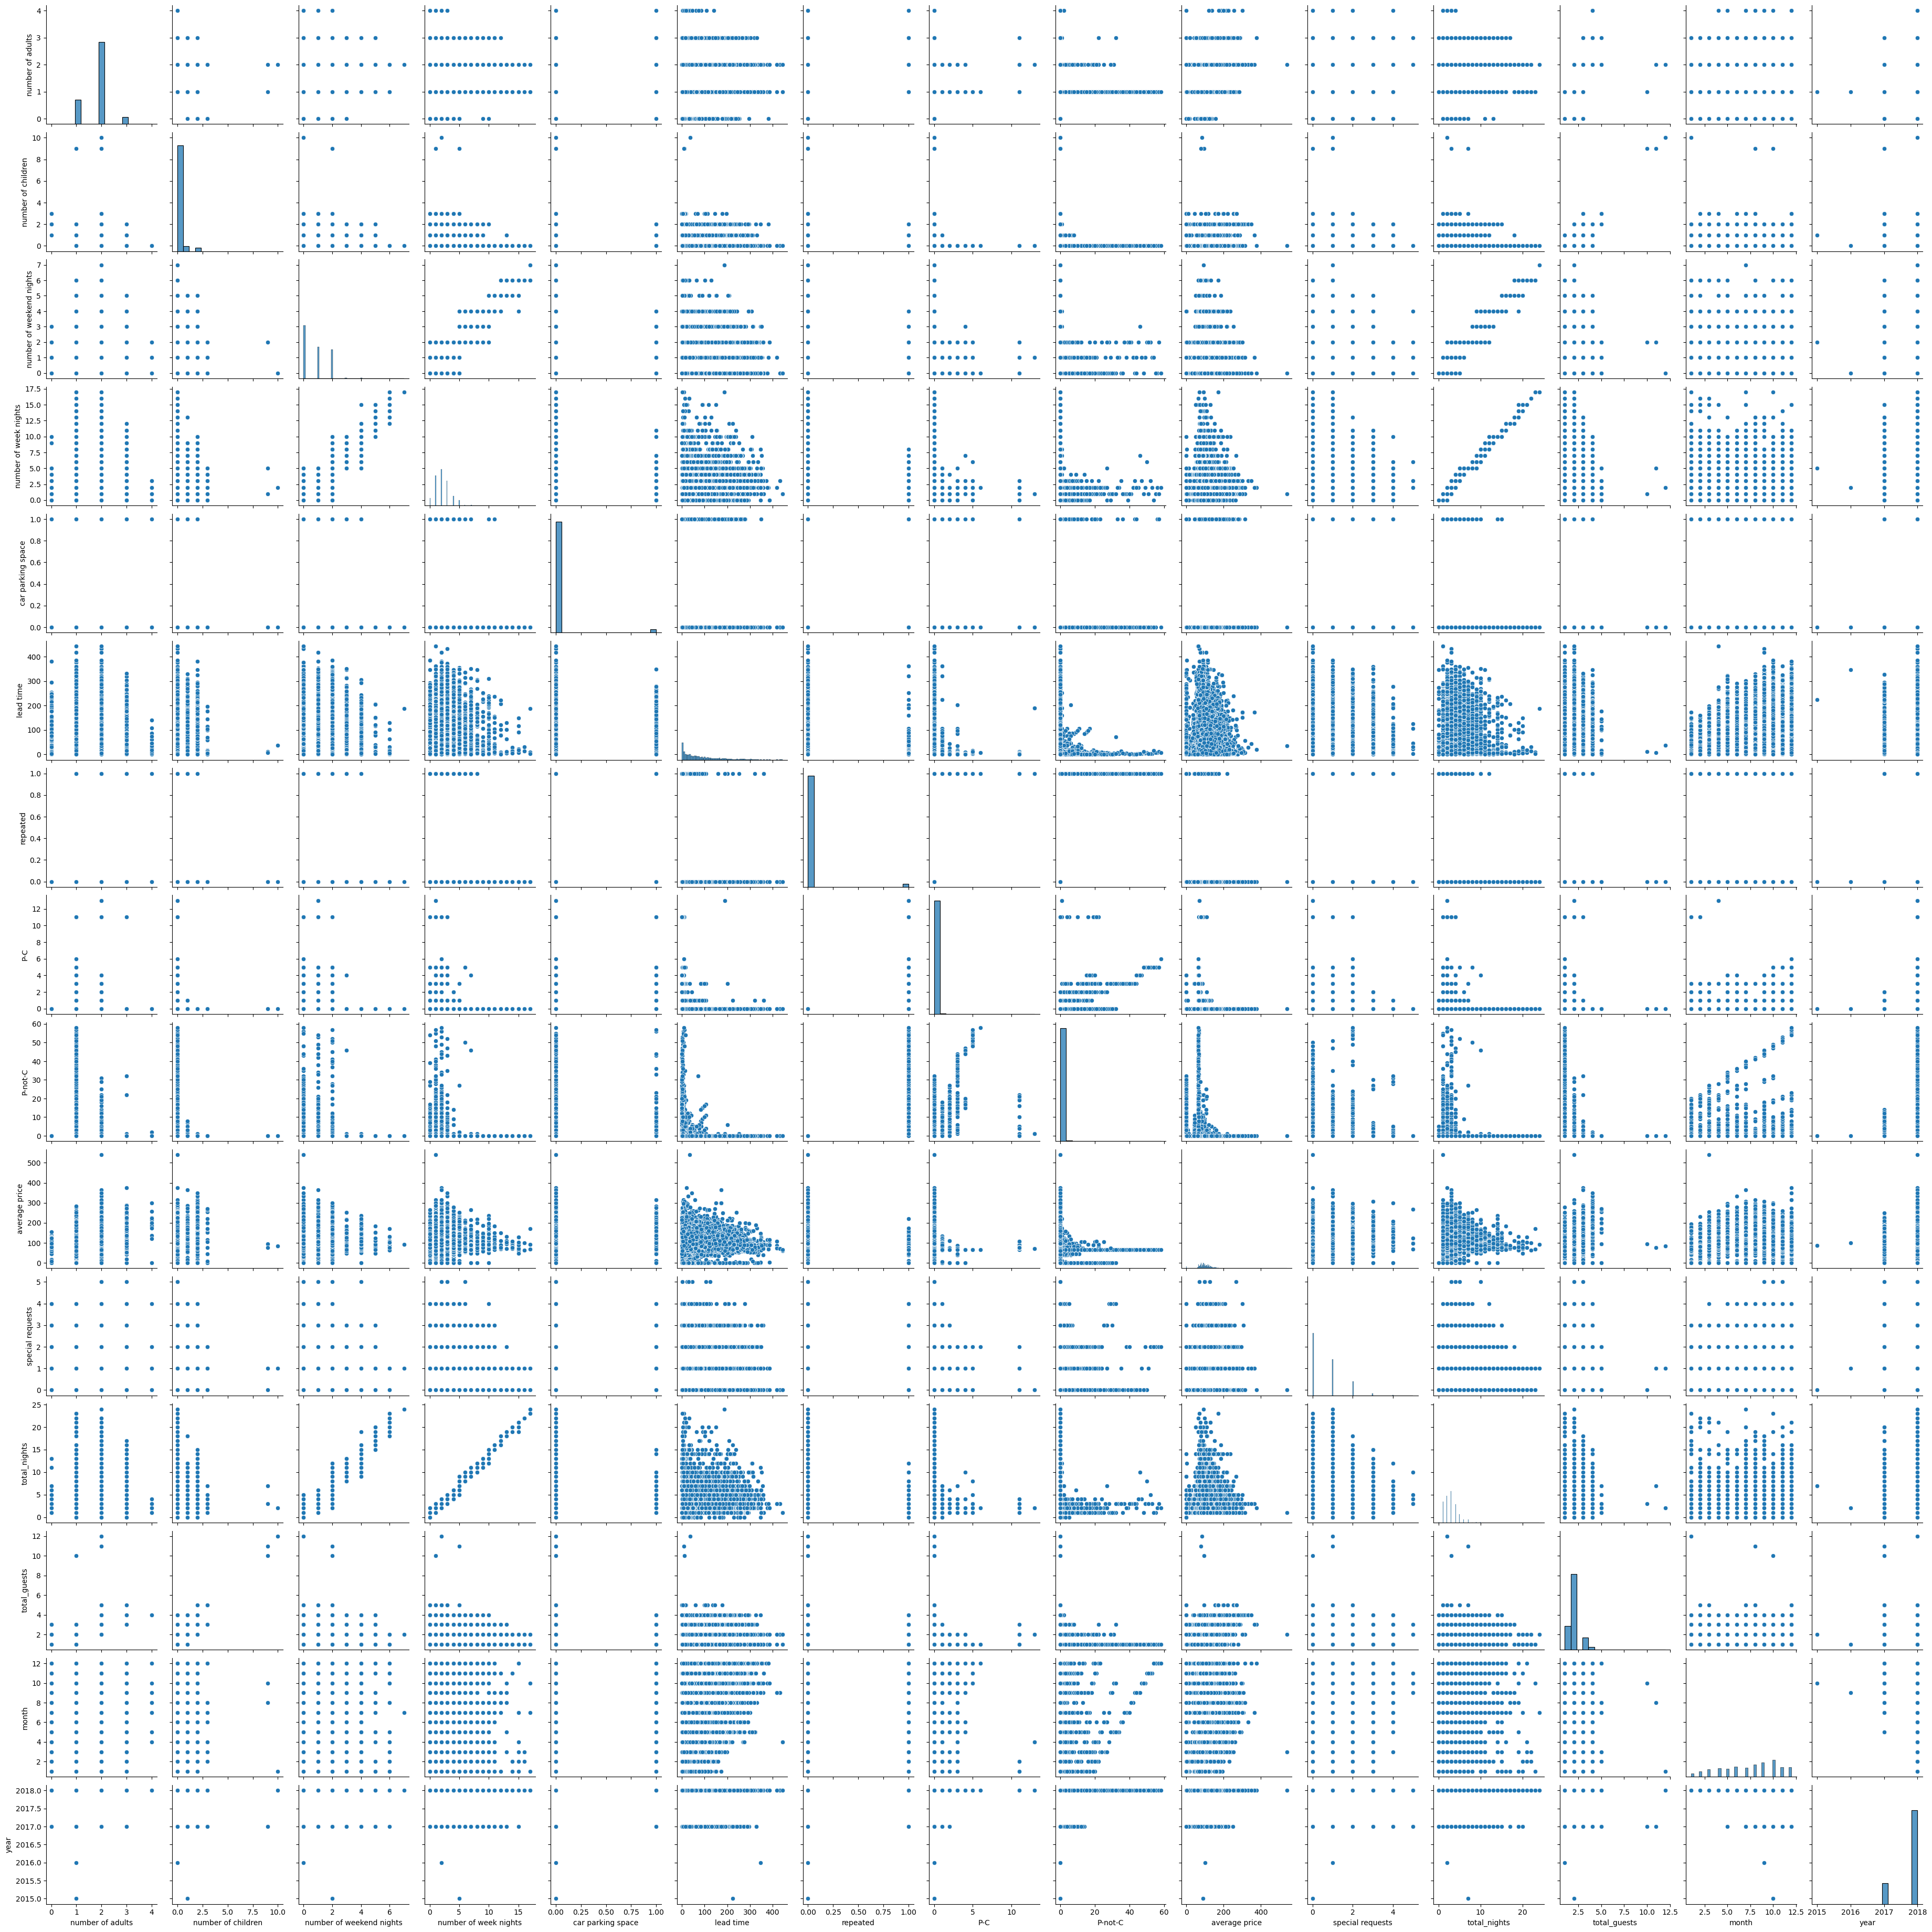

In [16]:
sns.pairplot(df)

In [17]:
sns.pairplot(df,hue="booking status")

# Removing Outliers 

In [18]:
#for numerical data 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mean_value = df[column].mean()
    df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), mean_value)
# Impute outliers for specific numeric features
for feature in numeric_cols:
    df = df

# Check the shape of the dataset after imputing outliers
print("Shape after imputing outliers:", df.shape)

Shape after imputing outliers: (36248, 21)


In [19]:
#for object data (market segment ,type of meal ,type of room ,year) 
print("values count for market segment type\n"+ str(df["market segment type"].value_counts())+"\n")
print("values count for type of meal\n"+str(df["type of meal"].value_counts())+"\n")
print("values count for type of room\n"+str(df["room type"].value_counts())+"\n")
print("values count for years\n"+str(df["year"].value_counts())+"\n")

values count for market segment type
Online           23201
Offline          10521
Corporate         2011
Complementary      390
Aviation           125
Name: market segment type, dtype: int64

values count for type of meal
Meal Plan 1     27809
Not Selected     5131
Meal Plan 2      3303
Meal Plan 3         5
Name: type of meal, dtype: int64

values count for type of room
Room_Type 1    28113
Room_Type 4     6051
Room_Type 6      964
Room_Type 2      692
Room_Type 5      263
Room_Type 7      158
Room_Type 3        7
Name: room type, dtype: int64

values count for years
2018.0000    29730
2017.8201     6518
Name: year, dtype: int64



In [20]:
# drop all rows with meal of type '3'
df.drop(df[df['type of meal'] == 'Meal Plan 3'].index,inplace=True)

In [21]:
# drop all rows with room of type '3'
df.drop(df[df['room type'] == 'Room_Type 3'].index,inplace=True)

In [22]:
#drop all rows with year (2016-2015)
df.drop(df[df['year'].isin([2016, 2015])].index,inplace=True) #cause outliers year already deleted above

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36236 entries, 0 to 36284
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36236 non-null  object        
 1   number of adults          36236 non-null  float64       
 2   number of children        36236 non-null  float64       
 3   number of weekend nights  36236 non-null  float64       
 4   number of week nights     36236 non-null  float64       
 5   type of meal              36236 non-null  object        
 6   car parking space         36236 non-null  float64       
 7   room type                 36236 non-null  object        
 8   lead time                 36236 non-null  float64       
 9   market segment type       36236 non-null  object        
 10  repeated                  36236 non-null  float64       
 11  P-C                       36236 non-null  float64       
 12  P-not-C           

# Feature Selection

In [24]:
# Drop costing columns or unwanted columns termporary
df.drop(["Booking_ID","date of reservation",'month','year'],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36236 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36236 non-null  float64
 1   number of children        36236 non-null  float64
 2   number of weekend nights  36236 non-null  float64
 3   number of week nights     36236 non-null  float64
 4   type of meal              36236 non-null  object 
 5   car parking space         36236 non-null  float64
 6   room type                 36236 non-null  object 
 7   lead time                 36236 non-null  float64
 8   market segment type       36236 non-null  object 
 9   repeated                  36236 non-null  float64
 10  P-C                       36236 non-null  float64
 11  P-not-C                   36236 non-null  float64
 12  average price             36236 non-null  float64
 13  special requests          36236 non-null  float64
 14  bookin

# Data Encoding

In [26]:
df['room type'] = df['room type'].str.extract('(\d+)').astype(int) 
df['type of meal'] = df['type of meal'].map({'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Not Selected': 0})
df['booking status'] = df['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})
df['market segment type'] = df['market segment type'].map( {'Offline' : 0 , 'Online' : 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4} )

In [27]:
df

number of adults  number of children  number of weekend nights  \
0              1.845178            0.105302                       2.0   
1              1.845178            0.000000                       1.0   
2              2.000000            0.105302                       1.0   
3              1.845178            0.000000                       0.0   
4              1.845178            0.000000                       1.0   
...                 ...                 ...                       ...   
36280          2.000000            0.000000                       0.0   
36281          2.000000            0.000000                       1.0   
36282          2.000000            0.000000                       1.0   
36283          1.845178            0.000000                       0.0   
36284          2.000000            0.000000                       0.0   

       number of week nights  type of meal  car parking space  room type  \
0                        5.0             1                0.0          1   
1                        3.0             0                0.0          1   
2                        3.0             1                0.0          1   
3                        2.0             1                0.0          1   
4                        2.0             0                0.0          1   
...                      ...           ...                ...        ...   
36280                    2.0             2                0.0          1   
36281                    3.0             1                0.0          1   
36282                    3.0             1                0.0          4   
36283                    4.0             1                0.0          1   
36284                    5.0             1                0.0          4   

       lead time  market segment type  repeated  P-C  P-not-C  average price  \
0      224.00000                    0       0.0  0.0      0.0          88.00   
1        5.00000                    1       0.0  0.0      0.0         106.68   
2        1.00000                    1       0.0  0.0      0.0          50.00   
3      211.00000                    1       0.0  0.0      0.0         100.00   
4       48.00000                    1       0.0  0.0      0.0          77.00   
...          ...                  ...       ...  ...      ...            ...   
36280   85.28236                    1       0.0  0.0      0.0         115.00   
36281   34.00000                    1       0.0  0.0      0.0         107.55   
36282   83.00000                    1       0.0  0.0      0.0         105.61   
36283  121.00000                    0       0.0  0.0      0.0          96.90   
36284   44.00000                    1       0.0  0.0      0.0         133.44   

       special requests  booking status  total_nights  total_guests  
0              0.000000               0           7.0       2.00000  
1              1.000000               0           4.0       1.95048  
2              0.000000               1           4.0       1.95048  
3              1.000000               1           2.0       1.95048  
4              0.000000               1           3.0       1.95048  
...                 ...             ...           ...           ...  
36280          1.000000               1           2.0       2.00000  
36281          1.000000               0           4.0       2.00000  
36282          1.000000               0           4.0       2.00000  
36283          1.000000               0           4.0       1.95048  
36284          0.620034               0           5.0       2.00000  

[36236 rows x 17 columns]

In [28]:
scaler=MinMaxScaler()
data_normalized = scaler.fit_transform(df)
data_normalized = pd.DataFrame(data_normalized, columns=df.columns)
data_normalized

number of adults  number of children  number of weekend nights  \
0                   0.0                 1.0                       0.4   
1                   0.0                 0.0                       0.2   
2                   1.0                 1.0                       0.2   
3                   0.0                 0.0                       0.0   
4                   0.0                 0.0                       0.2   
...                 ...                 ...                       ...   
36231               1.0                 0.0                       0.0   
36232               1.0                 0.0                       0.2   
36233               1.0                 0.0                       0.2   
36234               0.0                 0.0                       0.0   
36235               1.0                 0.0                       0.0   

       number of week nights  type of meal  car parking space  room type  \
0                   0.833333           0.5                0.0        0.0   
1                   0.500000           0.0                0.0        0.0   
2                   0.500000           0.5                0.0        0.0   
3                   0.333333           0.5                0.0        0.0   
4                   0.333333           0.0                0.0        0.0   
...                      ...           ...                ...        ...   
36231               0.333333           1.0                0.0        0.0   
36232               0.500000           0.5                0.0        0.0   
36233               0.500000           0.5                0.0        0.5   
36234               0.666667           0.5                0.0        0.0   
36235               0.833333           0.5                0.0        0.5   

       lead time  market segment type  repeated  P-C  P-not-C  average price  \
0       0.775087                 0.00       0.0  0.0      0.0       0.415335   
1       0.017301                 0.25       0.0  0.0      0.0       0.534696   
2       0.003460                 0.25       0.0  0.0      0.0       0.172524   
3       0.730104                 0.25       0.0  0.0      0.0       0.492013   
4       0.166090                 0.25       0.0  0.0      0.0       0.345048   
...          ...                  ...       ...  ...      ...            ...   
36231   0.295095                 0.25       0.0  0.0      0.0       0.587859   
36232   0.117647                 0.25       0.0  0.0      0.0       0.540256   
36233   0.287197                 0.25       0.0  0.0      0.0       0.527859   
36234   0.418685                 0.00       0.0  0.0      0.0       0.472204   
36235   0.152249                 0.25       0.0  0.0      0.0       0.705687   

       special requests  booking status  total_nights  total_guests  
0              0.000000             0.0      1.000000           1.0  
1              0.500000             0.0      0.571429           0.0  
2              0.000000             1.0      0.571429           0.0  
3              0.500000             1.0      0.285714           0.0  
4              0.000000             1.0      0.428571           0.0  
...                 ...             ...           ...           ...  
36231          0.500000             1.0      0.285714           1.0  
36232          0.500000             0.0      0.571429           1.0  
36233          0.500000             0.0      0.571429           1.0  
36234          0.500000             0.0      0.571429           0.0  
36235          0.310017             0.0      0.714286           1.0  

[36236 rows x 17 columns]

# Feature Engineering

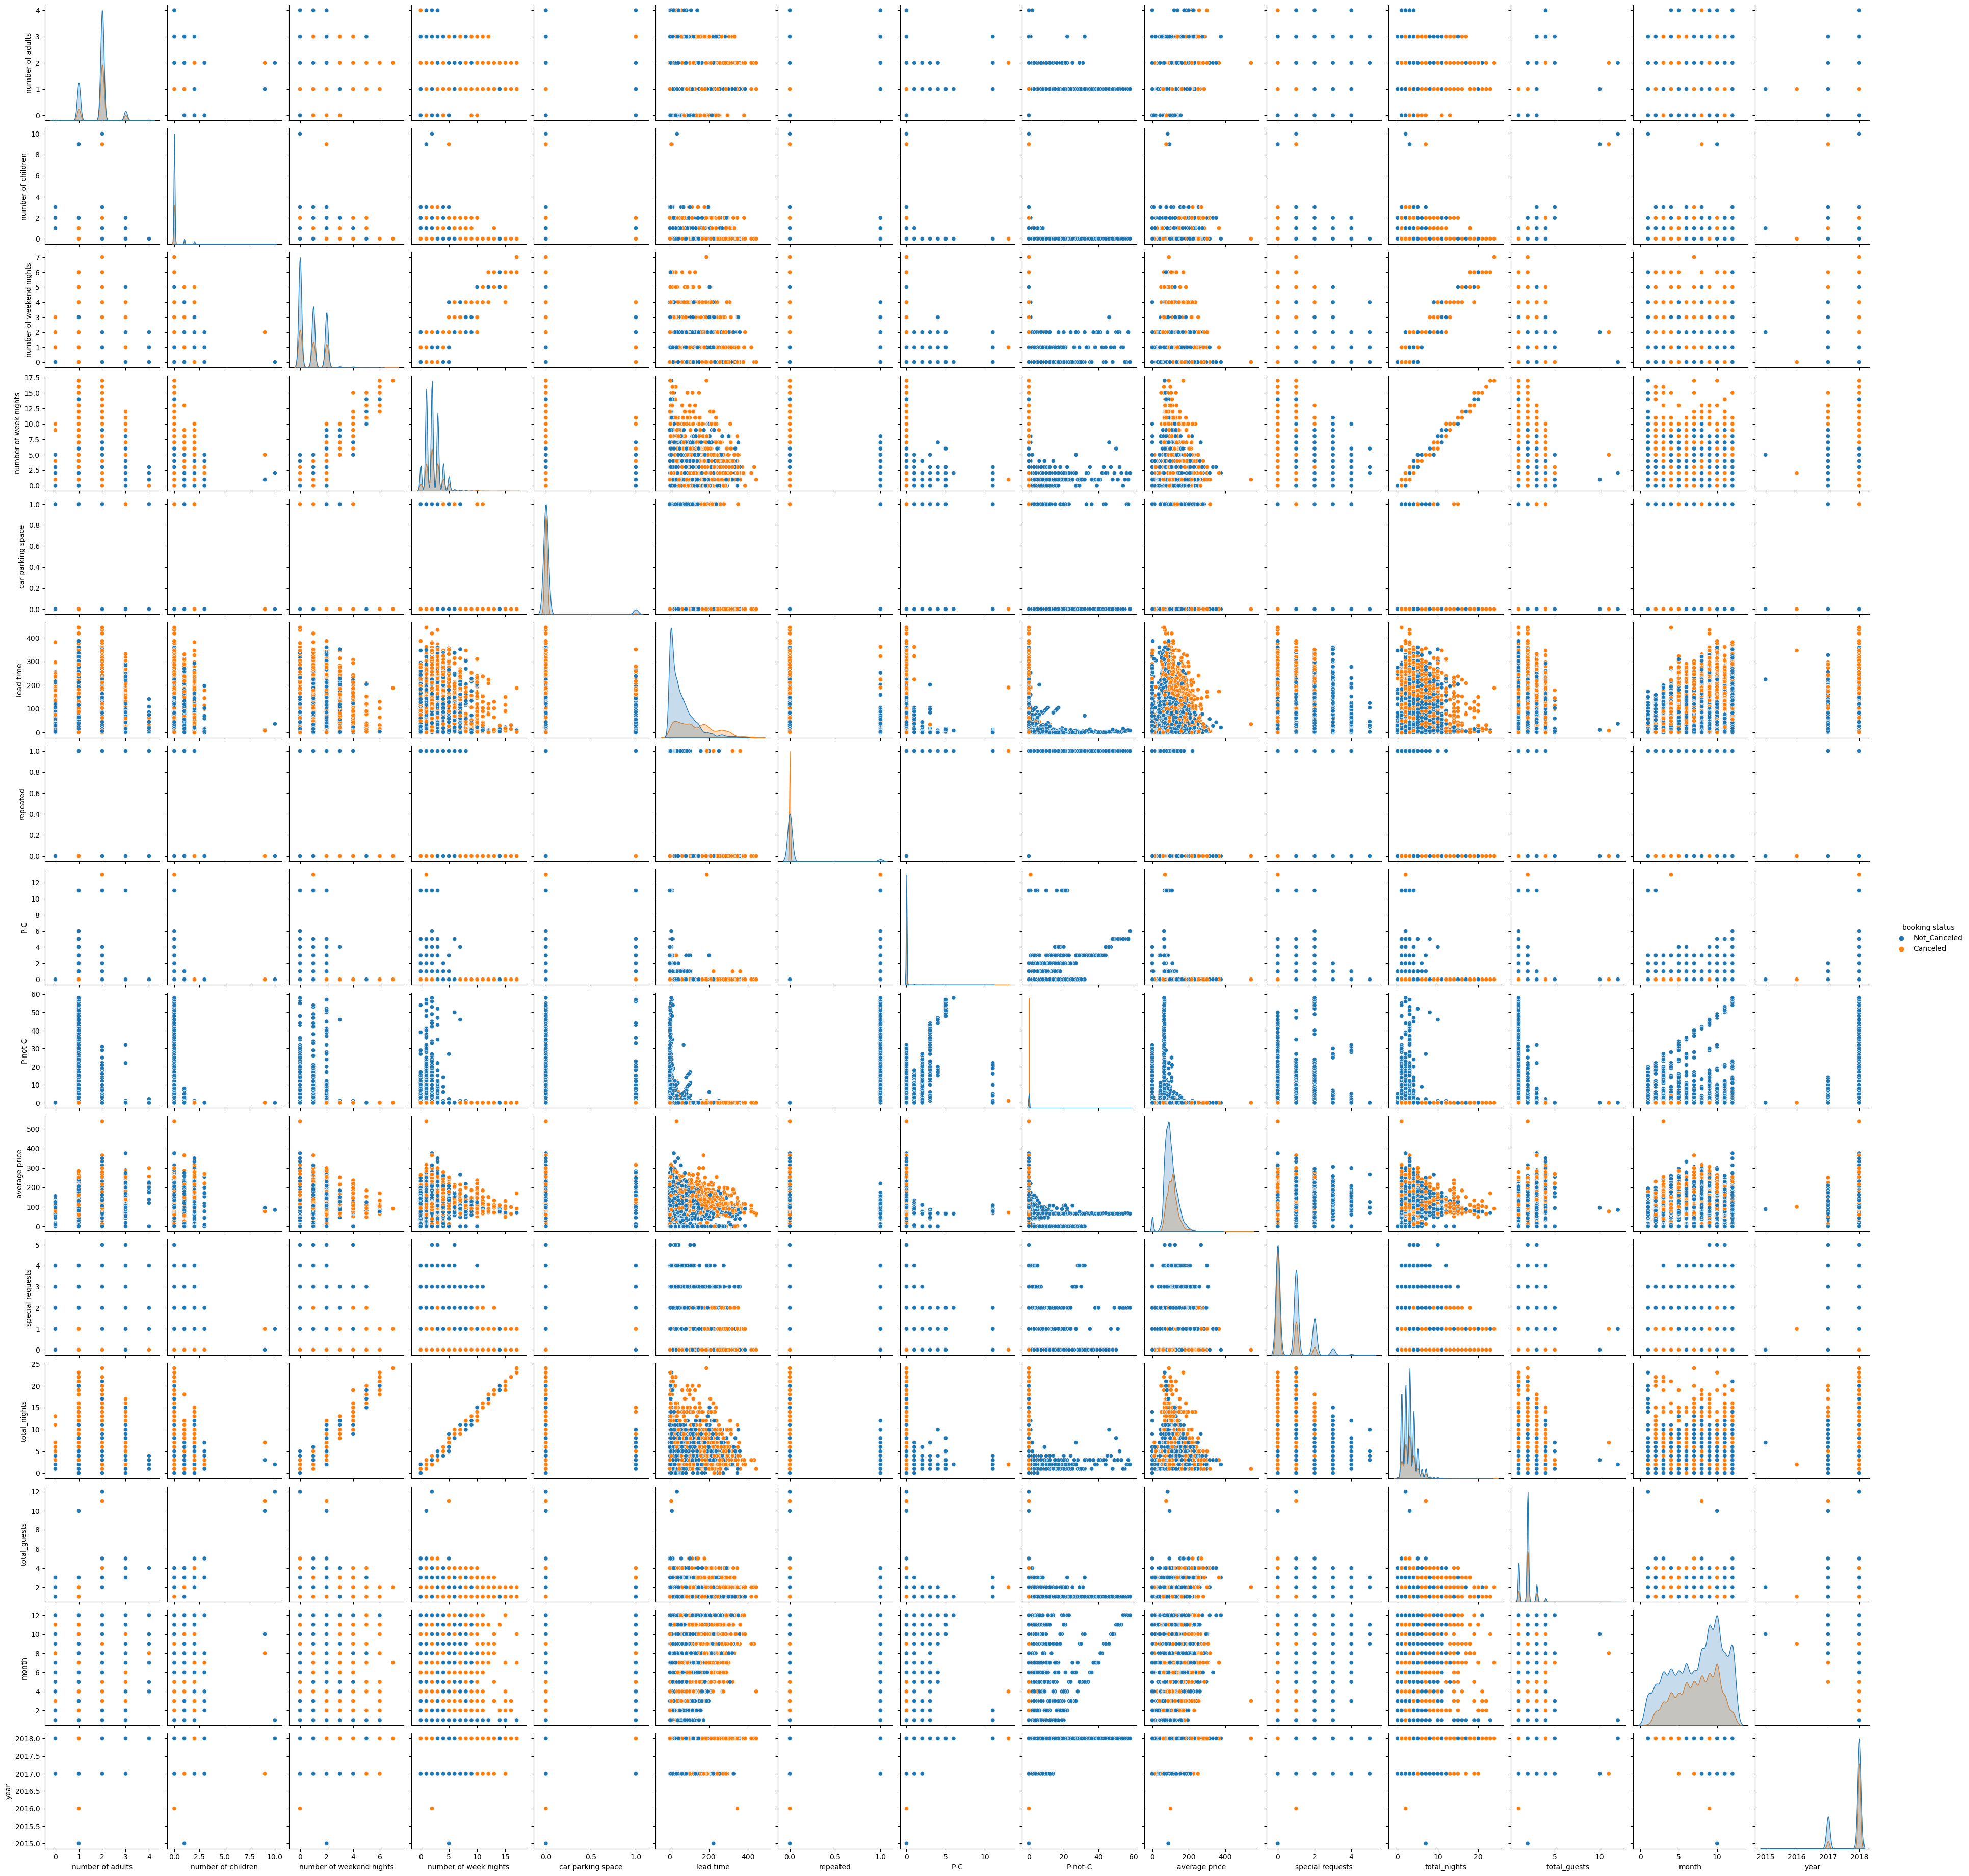

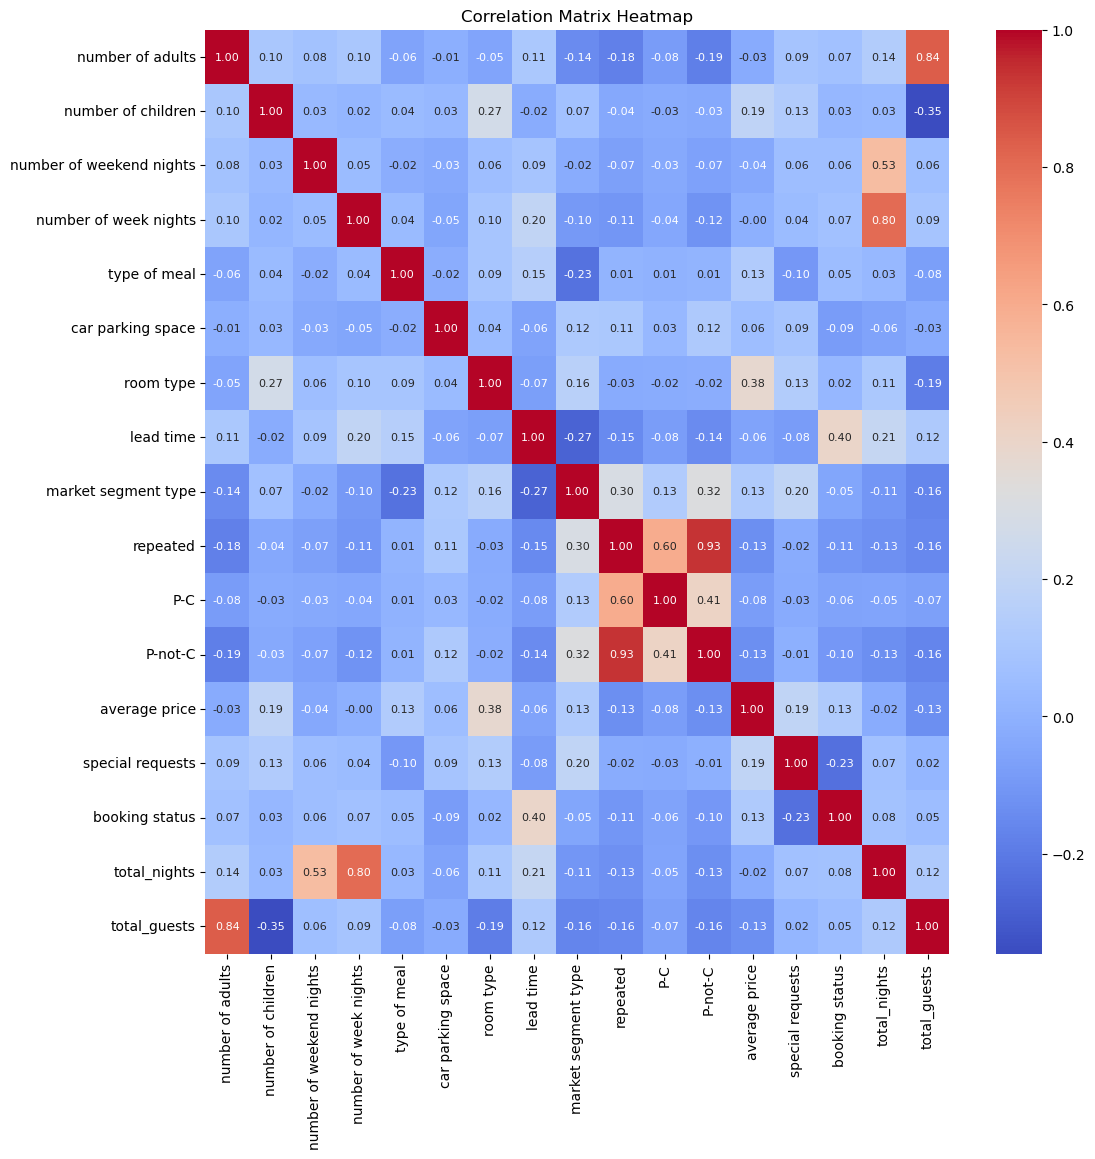

booking status              1.000000
lead time                   0.400383
average price               0.125663
total_nights                0.078414
number of adults            0.073449
number of week nights       0.071213
number of weekend nights    0.058599
total_guests                0.053517
type of meal                0.049826
number of children          0.026321
room type                   0.023510
market segment type        -0.048145
P-C                        -0.058476
car parking space          -0.085995
P-not-C                    -0.102678
repeated                   -0.107439
special requests           -0.234237
Name: booking status, dtype: float64


In [29]:
# Analyze correlation with the target variable 'booking status'
correlation_matrix =data_normalized.corr()
correlation_with_booking_status = correlation_matrix['booking status'].sort_values(ascending=False)

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.show()
print(correlation_with_booking_status)

In [30]:
# target , indepndent split 
x = data_normalized.drop(['booking status'], axis=1)
y = data_normalized['booking status']

# Train Test Split

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Development 

In [32]:
#Model 1: Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)

In [33]:
# Model 2: Decision Tree Regressor
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [34]:
# Model 3: Random Forest Regressor
rf_model = RandomForestClassifier(max_depth=18, n_estimators=50 , random_state= 42)
rf_model.fit(X_train, y_train)
y_pred_random = rf_model.predict(X_test)

In [35]:
# Evaluate Logistic Regression
log_accuracy = accuracy_score(y_test, y_pred_log)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
forest_accuracy = accuracy_score(y_test, y_pred_random)

# Print the evaluation metrics
print(f"Accuracy for logistic regression: {log_accuracy}")
print(f"Accuracy for decision tree      : {tree_accuracy}")
print(f"Accuracy for random forest      : {forest_accuracy}")

Accuracy for logistic regression: 0.7637969094922737
Accuracy for decision tree      : 0.8523730684326711
Accuracy for random forest      : 0.8905905077262694


# Parameter Tunning

In [36]:
# for random forest regression
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


Trying this parameters got 80 % accuracy

In [37]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=6)


And for trying this got 77 % accuracy

In [38]:
#for logistic model
log_reg = LogisticRegression()

params = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]}

grid_search = GridSearchCV(log_reg, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Logistic Regression"] = accuracy_score(y_test, y_pred)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.7596935837029097
Accuracy: 0.76
